# 6. házi feladat (HF6)

Beadási határidő: december 13. éjfél

Beküldés: a Microsoft Teams felületén keresztül

Adj szöveges választ is, ahol a feladatkitűzés ezt kéri!

---

## 1. feladat (HF6/1) (3 pont)

Ebben a feladatban karakterfelismerési feladatot kell megoldanod neurális hálót tanítva Keras segítségével.

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import np_utils
import sklearn
from sklearn.decomposition import PCA
from PIL import Image, ImageOps
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.optimizers import SGD, Adam, RMSprop, Adagrad
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

**a)** (1 pont)<br>
Az órán bemutatott notebook alapján taníts karakterfelismerésre alkalmas neurális hálót az MNIST adathalmazon! Változtass a neurális hálózat architektúráján is!
> Tipp: telepítsd a Kerast az Anaconda Navigator Environments fülén keresztül.

In [11]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

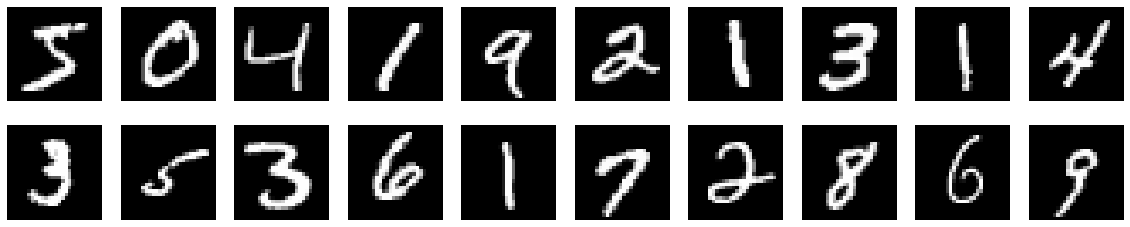

In [12]:
plt.figure(figsize=(20,4))
for i in range(20):
  plt.subplot(2,10,i+1)
  plt.axis('off')
  plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))

In [13]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
X_train = X_train / 255
X_test = X_test / 255
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [14]:
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu', data_format="channels_last"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [47]:
model.fit(X_train, y_train, batch_size=100, epochs=1, verbose=0, validation_split=0.1)

**b)** (2 pont)<br>
Értékeld ki a modell teljesítményét a teszthalmazon, majd használd a modellt saját magad által kézzel írt számjegyek felismerésére! Ehhez szkennelj be vagy fényképezz be néhány általad írt karaktert, és alkalmazd arra a modellt. Ezzel kapcsolatban is találsz segítséget a fent említett notebookban! Mit tapasztalsz, felismeri a kézírásodat? Milyen különbségek vannak az írásod és az adathalmazban lévő karakterek között, amelyek "félrevezethetik" a hálót?

In [48]:
score = model.evaluate(X_test, y_test, verbose=0)
score[1]

0.9878000020980835

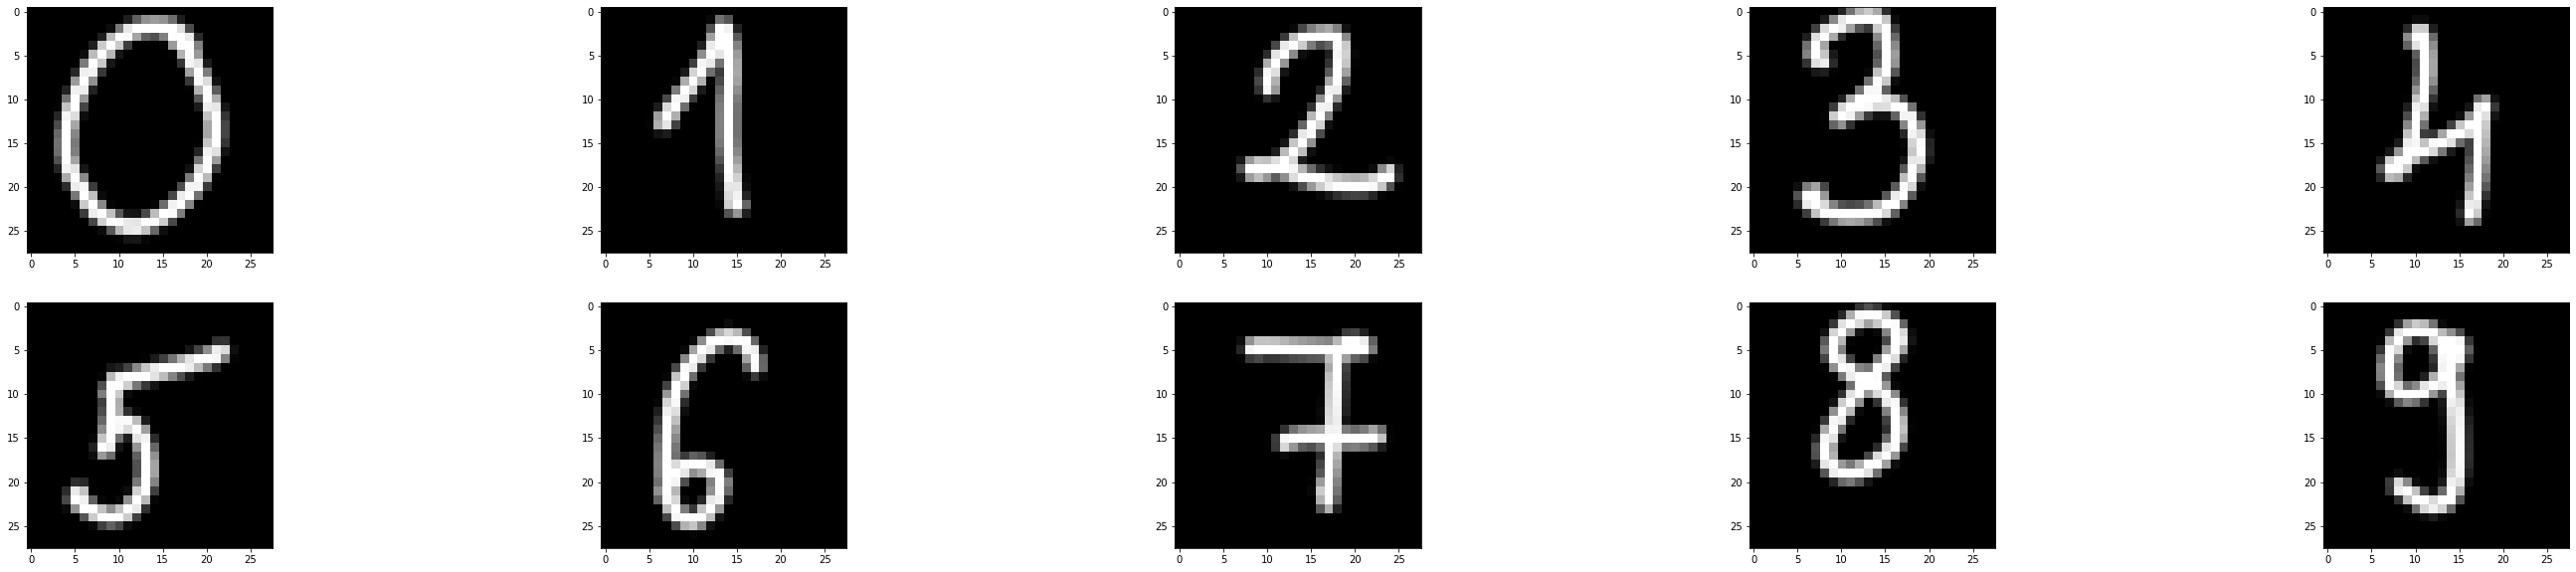

In [70]:
# visualizing hand-written digits
thresholds = {}
thresholds[ 0 ] = ( 119 , 89 , 319 , 289 )
thresholds[ 1 ] = ( 406 , 89 , 606 , 289 )
thresholds[ 2 ] = ( 669 , 89 , 869 , 289 )
thresholds[ 3 ] = ( 995 , 89 , 1195 , 289 )
thresholds[ 4 ] = ( 1307 , 69 , 1507 , 269 )
thresholds[ 5 ] = ( 107 , 445 , 307 , 645 )
thresholds[ 6 ] = ( 409 , 445 , 609 , 645 )
thresholds[ 7 ] = ( 689 , 445 , 889 , 645 )
thresholds[ 8 ] = ( 997 , 445 , 1197 , 645 )
thresholds[ 9 ] = ( 1321 , 419 , 1521 , 619 )

plt.figure( figsize = ( 50 , 10 ) )
for i in range( 10 ):
    image = Image.open("../HF/numbers.jpg" )
    width, height = image.size
    image = image.crop( thresholds[ i ] )
    image = ImageOps.invert( image )
    image.thumbnail( ( 28 , 28 ) )
    image_data = np.asarray( image , dtype = np.uint8 )
    image_data = image_data.sum( 2 ).astype( float )
    image_data /= image_data.max()
    plt.subplot( 2 , 5 , i + 1 )
    plt.imshow( image_data, cmap = plt.cm.gray )

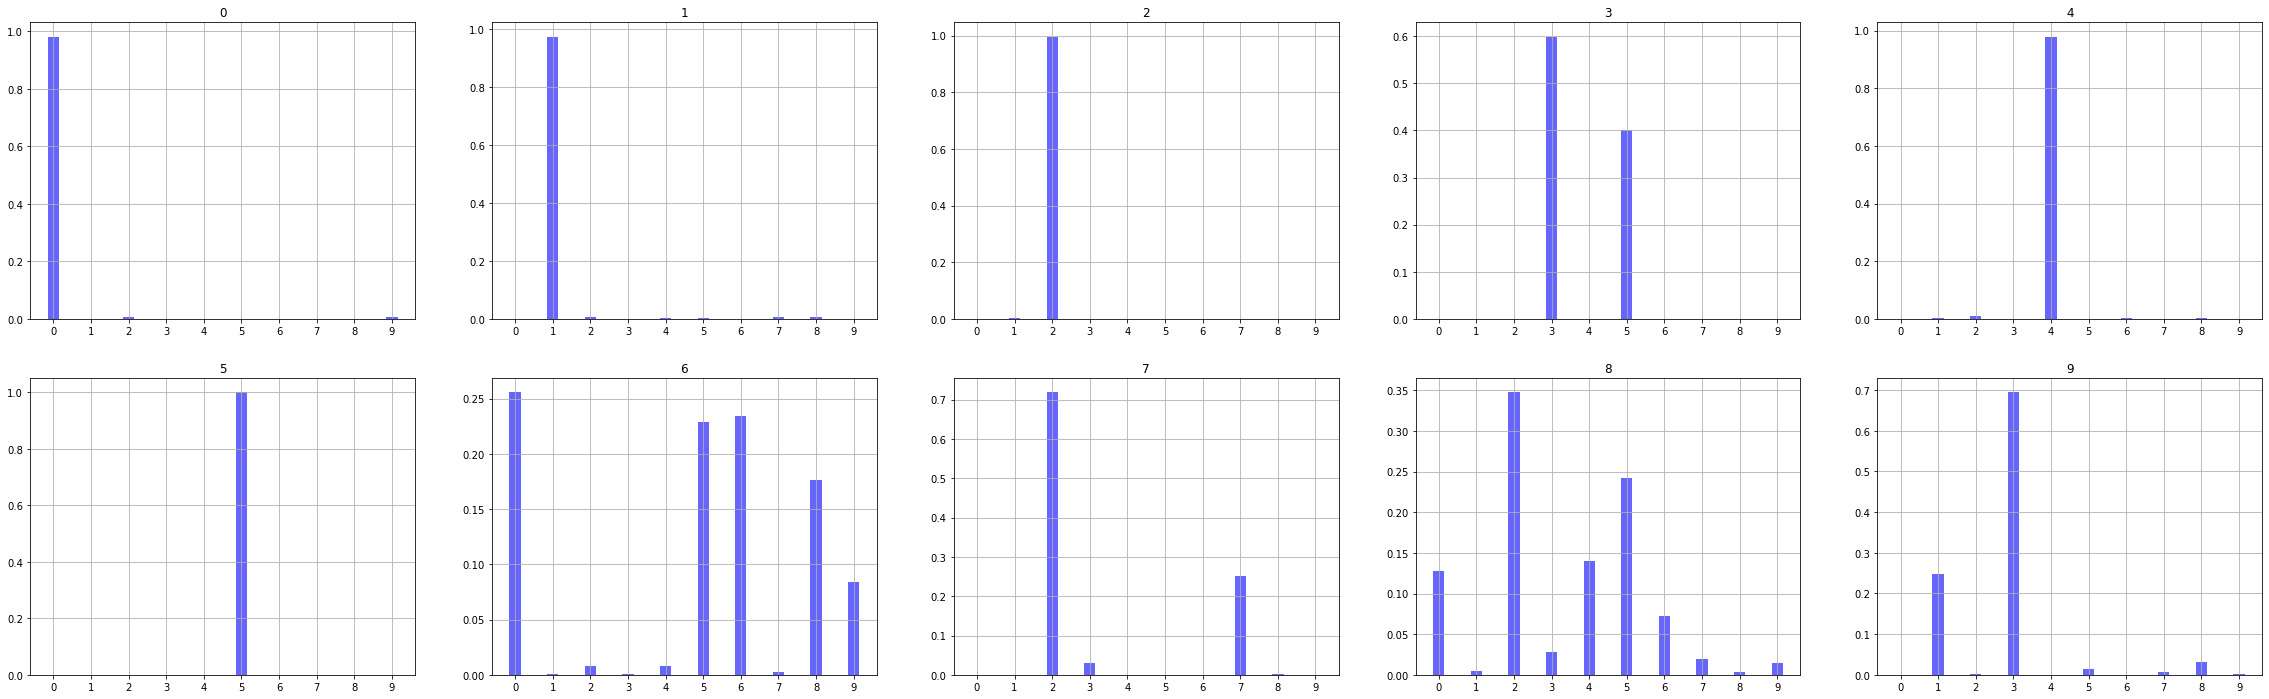

In [72]:
# using the trained model to recognize hand-written digits
plt.figure( figsize = ( 40 , 12 ) )
for i in range( 10 ):
    image = Image.open( "../HF/numbers.jpg" )
    width, height = image.size
    image = image.crop( thresholds[ i ] )
    image = ImageOps.invert( image )
    image.thumbnail( ( 28 , 28 ) )
    image_data = np.asarray( image , dtype = np.uint8 )
    image_data = image_data.sum( 2 ).astype( float )
    image_data /= image_data.max()
    image_data = image_data.reshape(1, 28 , 28, 1 )
    predictions = model.predict( image_data > 0.8 )
    plt.subplot( 2 , 5 , i + 1 )
    plt.bar( range( 10 ) , predictions[ 0 ] , 0.3 , color = "b" , alpha = 0.6 )
    plt.title( i )
    plt.grid()
    plt.xticks( range( 10 ) )

Vannak számjegyek, amiket felismer a modell, például: 0, 1, 2, 4, 5.
Különbség lehet az írásomban például az, hogy én áthúzom a 7-est, vagy az, hogy a 6-osom hasa igen kicsi, amiért nem veszi eléggé figyelembe.

---

## 2. feladat (HF6/2) (7 pont)

Ebben a feladatban vásárlói kosarak adatait fogjuk elemezni asszociációs szabályokat keresve.

**a)** (1 pont)<br>
Az [UCI adattárház Online Retail Data Set](http://archive.ics.uci.edu/ml/datasets/online+retail) adatai alapján fogunk vizsgálódni.
* Töltsd be az adatokat egy pandas dataframe-be. (Az adatot közvetlenül az internetről, a fájl saját gépre való letöltése nélkül töltsd be!)
* Végezz el néhány adattisztítási lépést!
    * A Description mező néhányszor white space karakterekkel kezdődik vagy végződik, ezeket a white space karaktereket távolítsd el!
> Tipp: használd az *str.strip()* függvényt!
    * Töröld azokat a sorokat, amelyeknél hiányzik a számla száma! Szintén szűrd ki azokat a sorokat, ahol a számla számában "c" karakter található.

In [73]:
datas = pd.read_excel("http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx")

In [74]:
datas.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [105]:
for i in range(len(datas)):
    str(datas["Description"][i]).strip().rstrip()
    if "C" in str(datas["InvoiceNo"][i]):
        datas.drop(datas.index[i])

In [104]:
datas["InvoiceNo"].replace("", float("NaN"), inplace=True)
datas.dropna(subset = ["InvoiceNo"], inplace=True)

**b)** (2 pont)<br>
Hozz létre egy új adattáblát, mely a Franciaországból érkező rendelésekre vonatkozik, és a sorai az egyes számlaazonosítóknak felelnek meg, míg az oszlopai az egyes termékekhez tartoznak. Az *i*-edik sor *j*-edik eleme 1, ha az *i*-edik számla a *j*-edik terméket tartalmazza, és 0 különben. A "POSTAGE" terméket elhagyhatod, mert ez kimutat a vizsgálódási körünkből.
> Tipp: használd a már Notebook01-ben is használt *groupby* függvényt mind az 'InvoiceNo', mind a 'Description' oszlop szerint, illetve használd az *unstack* függvényt!

In [106]:
france = datas[datas["Country"] == "France"]

In [108]:
france_sum = france.groupby(['InvoiceNo','Description'])['Quantity'].sum()
france_sum.head()

InvoiceNo  Description                     
536370      SET 2 TEA TOWELS I LOVE LONDON     24
           ALARM CLOCK BAKELIKE GREEN          12
           ALARM CLOCK BAKELIKE PINK           24
           ALARM CLOCK BAKELIKE RED            24
           CHARLOTTE BAG DOLLY GIRL DESIGN     20
Name: Quantity, dtype: int64

**c)** (1 pont)<br>
Asszociációs szabályokat fogunk keresni, ehhez telepítsd az mlxtend csomagot!
> Tipp: Anaconda Prompt: !pip install mlxtend

* Az mlxtend.frequent_patterns *apriori* függvényével keresd meg a gyakori elemhalmazokat úgy, hogy a minimális támogatottságot 0.07-re állítod!
* Ezután a gyakori elemhalmazokból generálj asszociációs szabályokat az mlxtend.frequent_patterns *association_rules* függvényével, úgy hogy olyan asszociációs szabályokat találj, amire a lift érték legalább 1!
> Tipp: a függvény attribútumában állítsd a metrikát liftre, a küszöböt pedig 1-re!

**d)** (1 pont)<br>
A szabályokat egy dataframe-ben kapod vissza, most szűrd ezt az adattáblát, hogy csak azokat a szabályokat mutassa, melyek lift mutatója legalább 6 és megbízhatósága legalább 0.8.

**e)** (2 pont)<br>
Nézd meg az adatokat Franciaország mellett egy másik országra is. Milyen különbségeket tapasztalsz? Fogalmazz meg egy-két ajánlást az áruház vezetőjének, amit az adatokból ki tudtál szűrni! 

---

## 3. feladat (HF6/3) (5 pont)

Ebben a feladatban egy személyiségteszt kérdéseire adott válaszokat fogjuk vizsgálni, és főkomponensanalízist (PCA) fogunk végrehajtani rajta.

**a)** (1 pont)<br>
Töltsd be az Adatok mappában található *PersonalityALL* nevű fájlt. Ez az adat egy 100 kérdéses személyiségtesztre adott válaszokat tartalmazza különböző kitöltőktől. A projektről a [MyPersonality honlapon](https://sites.google.com/michalkosinski.com/mypersonality) találsz bővebb információt, illetve az Adatok mappában megtalálod a kérdőív dokumentációját is, az eredmények értelmezésekor erre szükséged lesz! Ha megnéznéd vagy kitöltenéd a tesztet, akkor azt itt tudod megtenni: [discovermyprofile.com](https://discovermyprofile.com/tests).

**b)** (1 pont)<br>
Hány főkomponens tudja megmagyarázni a kérdésekre adott válaszokkal jellemzett rekordokban lévő variancia 50%-át?

**c)** (1 pont)<br>
Ábrázold a rekordokat az első két főkomponens által kifeszített síkon! Színezd a pontokat a nemnek megfelelően! Ez alapján elkülöníti a nemeket az első két főkomponens? Válaszod indokold!

**d)** (2 pont)<br>
Nézd meg, hogy az első néhány főkomponensben melyik kérdésekre adott válaszok szerepelnek nagy súllyal! Készíts jól értelmezhető ábrákat! Fel tudsz fedezni bármilyen kapcsolatot az egyes főkomponensek és a [Big five személyiségmodell](https://hu.wikipedia.org/wiki/Big_five_szem%C3%A9lyis%C3%A9gmodell)  (másként OCEAN-modell: Openness, Conscientiousness, Extraversion, Agreeableness, Neuroticis) öt személyiségvonása között? 

---